## КРИТЕРИЙ СОГЛАСИЯ КОЛМАГОРОВА-СМИРНОВА
***
$$D_n=\sqrt{n}*max_x |F_n(x)-F(x)|$$



$$\text{Функция нормального распределения:}$$
$$F(x)=\begin{cases}0 & \quad x\text{<0}\\x/n & \quad \text{0}\leq x \leq \text{n} \\1 & \quad x\text{>n}\end{cases}$$

In [42]:
import pandas as pd
df = pd.read_csv('trafic.csv', sep=',')
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.100,77.88.55.77,TCP,1464,56921 > 443 [ACK] Seq=1 Ack=1 Win=507 Len=14...
1,2,0.000000,192.168.0.100,77.88.55.77,TLSv1.2,481,Application Data
2,3,0.000165,192.168.0.100,77.88.55.77,TLSv1.2,86,Application Data
3,4,0.029613,192.168.0.100,64.233.165.198,TLSv1.2,783,Application Data
4,5,0.091180,192.168.0.100,77.88.55.77,TCP,1464,"[TCP Retransmission] 56921 > 443 [PSH, ACK] ..."
5,6,0.012051,77.88.55.77,192.168.0.100,TCP,54,443 > 56921 [ACK] Seq=1 Ack=1838 Win=298 Len=0
6,7,0.000399,77.88.55.77,192.168.0.100,TLSv1.2,89,Application Data
7,8,0.002295,77.88.55.77,192.168.0.100,TLSv1.2,146,Application Data
8,9,0.000086,192.168.0.100,77.88.55.77,TCP,54,56921 > 443 [ACK] Seq=1870 Ack=128 Win=512 L...
9,10,0.013580,64.233.165.198,192.168.0.100,TCP,54,443 > 56918 [ACK] Seq=1 Ack=730 Win=468 Len=0


In [43]:
import array
t=[]
Timedf= df[['Time']].values
Time= Timedf.tolist()
for d in Time:
    for k in d:
        t.append(k)

In [44]:
n=len(t)
n

74786

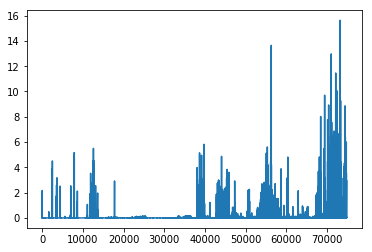

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t)

In [48]:
import scipy.stats as st
from scipy.stats import norm

modelfit = norm.fit(t)
norm_raspred = norm(loc = modelfit[0], scale = modelfit[1])
print(st.kstest(t, norm_raspred.cdf, alternative = "two-sided"))

KstestResult(statistic=0.4477444813647656, pvalue=0.0)
